

## Temporal serie: **Monthly beer production from the year 1956 to 1995 in Australia**.

---

*Author: Juan Carlos Recio Abad*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import combinations, product
from itertools import tee

For the development of the time series, the original dataset can be found on Kaggle at https://www.kaggle.com/code/mpwolke/australian-monthly-beer-production.


The production values range from 0 liters to a maximum of 220 million liters per month during the period from 1956 to 1996.


The production values fluctuate throughout the year with some regularity, and over time, there is an upward trend due to societal changes.

In [2]:
url = 'https://raw.githubusercontent.com/jcrecio/australian_beer_timeseries_analysis/main/datasetraw.csv'
csv = pd.read_csv(url, sep=",")
csv.head()

,Mes,Producción cerveza
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
csv.tail()

,Mes,Producción cerveza
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


Evolución temporal del valor de la producción de cerveza con el tiempo (por mes)

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Production')]

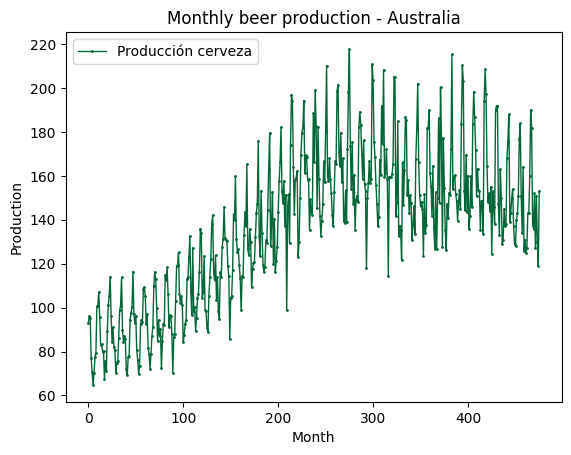

In [4]:
ax = csv.plot(lw=1, colormap='RdYlGn_r', marker='.', markersize=2, title='Monthly beer production - Australia')

ax.set(xlabel="Month", ylabel="Production")


## Discretización
Since the values are in the interval [0,200,000,000] = [0,200M] = [0,200], the values can be discretized into subintervals of 25.

*   [0,25] = 0
*   (25, 50] = 1
*   (50, 75] = 2
*   ...
*   (175, 200] = 7
*   (200, 220] = 8


In [6]:
# Temporal serie construction from csv
serie = csv.loc[:,"Producción cerveza"]
serie = round(serie / 25).astype('int')
serie.head()

0    4
1    4
2    4
3    3
4    3
Name: Producción cerveza, dtype: int64

In [7]:
serie.tail()

471    5
472    6
473    5
474    5
475    6
Name: Producción cerveza, dtype: int64

# PST Vocabulary
Σ = 0,1,2,3,4,5,6,7,8

In [8]:
vocabulary = [0,1,2,3,4,5,6,7,8,9]

##Orden: 1

##Estados:

In [9]:
# First 50 values of the serie
y = "Serie="
count = 0
for x in serie:
  y = y + "," + str(x)
  count+=1
  if (count == 50): print(y + "," + str(x) + "...")


Serie=,4,4,4,3,3,3,3,3,3,4,4,4,4,3,3,3,3,3,3,3,4,4,4,5,4,3,4,3,3,3,3,3,3,4,4,5,4,3,3,3,3,3,3,3,4,4,4,5,4,4,4...


This series of numbers represents the **monthly beer production in Australia.**

###How to calculate the transition matrix:

Given a time series T, states defined by Q=q1,q2,q3,...,qn, and the symbol alphabet ∑=x1,x2,..., xn,

To calculate the transition matrix: For each state qi, count the number of subsequent symbols, and obtain the frequency of each symbol throughout the series. The total sum of all frequencies from that state to all its symbols should be 1.

For each transition from state qi to the next symbol xj, there is an entry in the matrix.

The sum of values in each row of the matrix should be 1 since it represents the sum of all probabilities from a state to all symbols it transitions to.

As for constructing the matrix with the beer production series for order = 2: 4,4,4,3,3,3,3,3,3,4,4,4,4,3,3,3,3,3,3,3,4,4,4,5,4,3,4,3,3,3,3,3,3,4,4,5,4,3,3,3,3,3,3,3,4,4,4,5,4,4,4...

P(4 | 4) = the number of times 4 occurs right after 4 in the entire series = 1/(frequency of 4 after 4) = X

P(3 | 4) = the number of times 3 occurs right after 4 in the entire series = 1/(frequency of 3 after 4) = X'

...

P(3 | 5) = the number of times 3 occurs right after 5 in the entire series = 1/(frequency of 3 after 5) = Y

P(2 | 3) = the number of times 2 occurs right after 3 in the entire series = 1/(frequency of 2 after 3) = Z

etc.


```
    1   2   3   4   5  ..
   ___________________________
.. |..........................
2  |........Z................. Z'+Z+..=1
3  |..........................
4  |........X'...X............ X'+X+..=1
5  |........Y................. Y+..Y' =1
.. |..........................
27 |..........................
```

In [10]:
def get_transition_matrix(serie):
    states = max(serie)+1
    matrix = [[0]*states for _ in range(states)]

    for (x,y) in zip(serie,serie[1:]): matrix[x][y] += 1
    for row in matrix:
        s = sum(row)
        if s > 0: row[:] = [r/s for r in row]

    return matrix


### Transition order-1 matrix

In [11]:
m = get_transition_matrix(serie)
for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.70 0.30 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.16 0.59 0.23 0.01 0.00 0.00 0.00
0.00 0.00 0.00 0.01 0.14 0.47 0.31 0.07 0.01 0.00
0.00 0.00 0.00 0.00 0.01 0.24 0.51 0.21 0.04 0.00
0.00 0.00 0.00 0.00 0.00 0.10 0.43 0.25 0.21 0.01
0.00 0.00 0.00 0.00 0.00 0.00 0.27 0.40 0.30 0.03
0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.50 0.00 0.00


```
      0    1    2    3    4    5    6    7    8    9    
0 | 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
1 | 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2 | 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
3 | 0.00 0.00 0.00 0.70 0.30 0.00 0.00 0.00 0.00 0.00 -> 0.70 + 0.30 = 1
4 | 0.00 0.00 0.00 0.16 0.59 0.23 0.01 0.00 0.00 0.00 -> 0.16 + 0.59 + 0.23 + 0.01 = 1
5 | 0.00 0.00 0.00 0.01 0.14 0.47 0.31 0.07 0.01 0.00 -> 0.1 + 0.14 + 0.47 + 0.31 + 0.07 + 0.01 = 1
6 | 0.00 0.00 0.00 0.00 0.01 0.24 0.51 0.21 0.04 0.00 -> 0.01 + 0.24 + 0.51 + 0.04 = 1
7 | 0.00 0.00 0.00 0.00 0.00 0.10 0.43 0.25 0.21 0.01 -> 0.10 + 0.43 + 0.25 + 0.21 + 0.01 = 1
8 | 0.00 0.00 0.00 0.00 0.00 0.00 0.27 0.40 0.30 0.03 -> 0.27 + 0.40 + 0.30 + 0.03 = 1
9 | 0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.50 0.00 0.00 -> 0.50 + 0.50 = 1
```

Order 2

In [12]:
serie_order_2 = []
partial = ''
for item in serie:
  if(len(partial)==2):
    serie_order_2.append(partial)
    partial = str(item)
  else:
    partial += str(item)

states_order_2 = list(set(serie_order_2))


The states of order 2 represent the **bi-monthly beer production in Australia.**
##Order-2 matrix

How to construct the matrix with the beer production for order = 2: 4,4,4,3,3,3,3,3,3,4,4,4,4,3,3,3,3,3,3,3,4,4,4,5,4,3,4,3,3,3,3,3,3,4,4,5,4,3,3,3,3,3,3,3,4,4,4,5,4,4,4...

P(4 | 44) = the number of times 4 occurs after 44 in the entire series = 1/(frequency of 4 after 44) = X

P(4 | 57) = the number of times 4 occurs after 57 in the entire series = 1/(frequency of 4 after 57) = Y

P(1 | 32) = the number of times 1 occurs after 32 in the entire series = 1/(frequency of 1 after 32) = Z

etc.
```
    1   2   3   4   5  ..
   ___________________________
.. |..........................
32 |Z.........................
.. |..........................
44 |............X.............
.. |..........................
57 |............Y.............
.. |..........................
```

### Generation of Transition Matrices of Order Higher than 1

I have created this alternative method for generating transition matrices of order N greater than 1 because the previous method did not accurately calculate the next symbol for each state.

In [14]:
def get_transition_matrix_order(states, serie, orden=2):
  matrix = {}
  states_count = {}
  for state in states:
    matrix[state] = {}
    states_count[state] = 0

  count = len(serie)
  i = 0
  index = 0
  acc = ''
  for item in serie:
    if (index != orden):
      acc += str(item)
      index += 1
    else:
      index = 0
      if (i+1 < count -1):
        if (acc in matrix):
          state = matrix[acc]
          if(serie[i+1] not in state): state[serie[i+1]]=0
          count_item = state[serie[i+1]]
          state[serie[i+1]] = count_item + 1
          states_count[acc] = states_count[acc] + 1
      acc = ''
    i+=1

  for est in matrix:
    for sim in matrix[est]:
      matrix[est][sim] = matrix[est][sim] / states_count[est]


  return matrix

def display_matrix(matrix, vocabulary):
  header = '  |'
  for v in vocabulary:
    header += ' ' + str(v)
  print(header)
  for est in matrix:
    fila = est + '|'
    for v in vocabulary:
      if (v not in matrix[est]):
        fila += ' 0'
      else:
        fila += ' ' + str(matrix[est][v])
    print(fila)

m2 = get_transition_matrix_order(states_order_2, serie)
display_matrix(m2, vocabulary)

  | 0 1 2 3 4 5 6 7 8 9
43| 0 0 0 0.8 0.2 0 0 0 0 0
87| 0 0 0 0 0 0 0.6666666666666666 0.3333333333333333 0 0
34| 0 0 0 0.25 0.25 0.5 0 0 0 0
45| 0 0 0 0 0.6666666666666666 0.3333333333333333 0 0 0 0
66| 0 0 0 0 0 0.15789473684210525 0.5263157894736842 0.21052631578947367 0.10526315789473684 0
65| 0 0 0 0 0 0.36363636363636365 0.36363636363636365 0.2727272727272727 0 0
77| 0 0 0 0 0 0 0.8333333333333334 0.16666666666666666 0 0
57| 0 0 0 0 0 0 0 1.0 0 0
53| 0 0 0 0 0 0 0 0 0 0
79| 0 0 0 0 0 0 0 0 0 0
58| 0 0 0 0 0 0 0 0 0 0
56| 0 0 0 0 0 0.4444444444444444 0.3333333333333333 0.2222222222222222 0 0
64| 0 0 0 0 0 0 0 0 0 0
75| 0 0 0 0 0 0 1.0 0 0 0
67| 0 0 0 0 0 0.125 0.75 0 0.125 0
88| 0 0 0 0 0 0 0.5 0.5 0 0
68| 0 0 0 0 0 0 1.0 0 0 0
76| 0 0 0 0 0 0 0.875 0.125 0 0
78| 0 0 0 0 0 0 0.2857142857142857 0.7142857142857143 0 0
89| 0 0 0 0 0 0 0 0 0 0
54| 0 0 0 0 0.5 0.5 0 0 0 0
44| 0 0 0 0.21052631578947367 0.5789473684210527 0.15789473684210525 0.05263157894736842 0 0 0
55| 0 0 0 0 0.277777

##Order-3 matrix

In [15]:
serie_order_3 = []
partial = ''
for item in serie:
  if(len(partial)==3):
    serie_order_3.append(partial)
    partial = str(item)
  else:
    partial += str(item)

states_order_3 = list(set(serie_order_3))

m3 = get_transition_matrix_order(states_order_3, serie, 3)
display_matrix(m3, vocabulary)

  | 0 1 2 3 4 5 6 7 8 9
766| 0 0 0 0 0 0 0.8 0 0.2 0
434| 0 0 0 0.5 0.5 0 0 0 0 0
567| 0 0 0 0 0 1.0 0 0 0 0
877| 0 0 0 0 0 0 1.0 0 0 0
565| 0 0 0 0 0 1.0 0 0 0 0
566| 0 0 0 0 0 0.5 0.5 0 0 0
787| 0 0 0 0 0 0 0 0 0 0
555| 0 0 0 0 0.2 0.5 0.3 0 0 0
564| 0 0 0 0 0 0 0 0 0 0
433| 0 0 0 0.5 0.5 0 0 0 0 0
665| 0 0 0 0 0 0 0 1.0 0 0
679| 0 0 0 0 0 0 0 0 0 0
757| 0 0 0 0 0 1.0 0 0 0 0
334| 0 0 0 0 0 0 0 0 0 0
455| 0 0 0 0 0.6666666666666666 0.3333333333333333 0 0 0 0
444| 0 0 0 0.4 0.5 0.1 0 0 0 0
553| 0 0 0 0 0 0 0 0 0 0
768| 0 0 0 0 0 0 0 0 0 0
667| 0 0 0 0 0 0.2857142857142857 0.7142857142857143 0 0 0
666| 0 0 0 0 0 0.3333333333333333 0.6666666666666666 0 0 0
888| 0 0 0 0 0 0 0 0 0 0
788| 0 0 0 0 0 0 0 0 0 0
655| 0 0 0 0 0 0 0.5 0.5 0 0
767| 0 0 0 0 0 0 1.0 0 0 0
677| 0 0 0 0 0 0 1.0 0 0 0
556| 0 0 0 0 0 0.4 0.6 0 0 0
676| 0 0 0 0 0 0 0 1.0 0 0
687| 0 0 0 0 0 0 0.5 0.5 0 0
777| 0 0 0 0 0 0 0.5 0.5 0 0
668| 0 0 0 0 0 0 1.0 0 0 0
344| 0 0 0 0 0.6666666666666666 0.3333333333333333 0 0 0 0
778

### Representation Alternatives for Order N > 1
Other alternatives for representing the series based on N-monthly beer production in Australia would be to readjust the series by summing the elements of the N-groups. For example:

4,4,3,2,1,3,2,1,3,3
with N=2 is:

(4,4),(3,2),(1,3),(2,1),(3,3) This could be represented by their sum (since N-monthly production is the sum).

(4+4),(3+2),(1+3),(2+1),(3+3) = **8,5,4,3,6**

With this sum, it would be necessary to redefine a vocabulary **Σ'** which includes all the symbols from **Σ** plus the sums that occur between them as integers.

**Σ'** = ( 0,1,2... max(**Σ**) x 2 )

The same criterion could be applied for any order.

**Σ'** = ( 0,1,2... max(**Σ**) x **N** )
